<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
/var/folders/8q/3ngjlxvn1ds0ggzhlfz2f3gh0000gn/T/ipykernel_93473/1515874443.py:35: SyntaxWarning: invalid escape sequence '\D'
  float: The change in energy, $\Delta E$.
MovieWriter Pillow unavailable; using Pillow instead.


Saving animation to deltaE_Vis ...
Animation saved successfully!


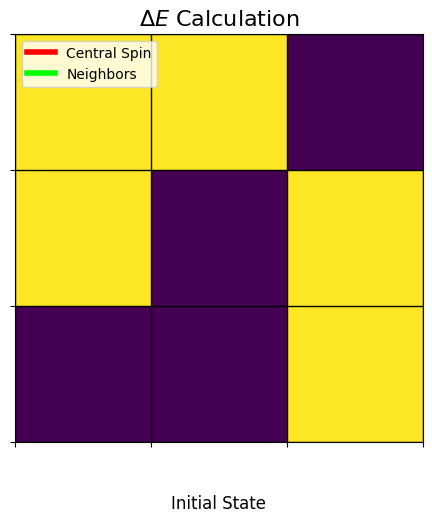

In [29]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

def create_spin_grid(nrows, ncols):
    grid = np.zeros((nrows, ncols), dtype = int)
    grid = np.random.choice([-1,1], size= (nrows,ncols) )
    return grid

def visualize_grid(grid, title):
    plt.imshow(grid, cmap= 'viridis', interpolation='nearest')
    plt.colorbar(ticks=[-1, 1], label='Spin value')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()


def calculate_delta_energy(grid, r, c, J, B_ext=0):
    """
    Calculates the change in energy if a single spin at (r, c) is flipped.
    This is much more efficient than recalculating the entire grid energy.
    
    Args:
        grid (numpy.ndarray): The 2D spin grid.
        r (int): The row index of the spin to be flipped.
        c (int): The column index of the spin to be flipped.
        J (float): The exchange coupling constant.
        B_ext (float): The external magnetic field strength. Defaults to 0.
        
    Returns:
        float: The change in energy, $\Delta E$.
    """
    rows, cols = grid.shape
    
    # Use modulo to handle periodic boundary conditions
    neighbors_sum = (grid[(r + 1) % rows, c] +
                     grid[(r - 1) % rows, c] +
                     grid[r, (c + 1) % cols] +
                     grid[r, (c - 1) % cols])
                     
    # Calculate the change in energy if the spin at (r, c) were to flip
    delta_E = 2 * J * grid[r, c] * neighbors_sum + 2 * B_ext * grid[r, c]
    
    return delta_E


def draw_highlights(ax, center_r, center_c, neighbors):
    """
    A helper function to draw the red and blue highlight rectangles.
    
    Args:
        ax (matplotlib.axes.Axes): The axes object for plotting.
        center_r (int): The row index of the central spin.
        center_c (int): The column index of the central spin.
        neighbors (list): A list of tuples for the neighbor coordinates.
    """
    # Highlight central spin in red
    ax.add_patch(Rectangle((center_c-0.5, center_r-0.5), 1, 1, fill=False, edgecolor='red', lw=8))
    # Highlight neighbors in blue
    for r, c in neighbors:
        ax.add_patch(Rectangle((c-0.5, r-0.5), 1, 1, fill=False, edgecolor='lime', lw=4))

def animate_delta_E(i, img, grid, text_display, ax):
    """
    Animates the calculation of Delta E for a single spin flip on a 3x3 grid.
    
    Args:
        i (int): The frame number.
        img (matplotlib.image.AxesImage): The image object to update.
        grid (numpy.ndarray): The 2D spin grid.
        text_display (matplotlib.text.Text): The text object for displaying information.
        ax (matplotlib.axes.Axes): The axes object for plotting.
    """
    # Remove old patches (highlights) from previous frame
    for patch in reversed(ax.patches):
        patch.remove()

    ax.set_title(r"$\Delta E$ Calculation", fontsize=16)

    # Center spin and its neighbors
    center_r, center_c = 1, 1
    neighbors = [(0, 1), (2, 1), (1, 0), (1, 2)]

    # Reset grid for each animation loop
    if i % 5 == 0:
        grid[:] = create_spin_grid(3, 3)
    
    img.set_data(grid)

    if i % 5 == 0:
        text_display.set_text(r"Initial State")
    elif i % 5 == 1:
        draw_highlights(ax, center_r, center_c, neighbors)
        text_display.set_text(r"Highlighting Central Spin and Neighbors")
    elif i % 5 == 2:
        draw_highlights(ax, center_r, center_c, neighbors)
        neighbors_sum = sum(grid[r, c] for r, c in neighbors)
        text_display.set_text(r"Neighbors Sum: %d" % neighbors_sum)
    elif i % 5 == 3:
        draw_highlights(ax, center_r, center_c, neighbors)
        delta_E = calculate_delta_energy(grid, center_r, center_c, J_coupling, B_field)
        text_display.set_text(r"$\Delta E = 2 J s_i \sum s_j = %.2f$" % delta_E)
    elif i % 5 == 4:
        delta_E = calculate_delta_energy(grid, center_r, center_c, J_coupling, B_field)
        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / (kb * temperature)):
            grid[center_r, center_c] *= -1
            text_display.set_text(r"Flip Accepted! New state shown.")
        else:
            text_display.set_text(r"Flip Rejected! State remains the same.")
        # Only highlight the central spin on the last frame
        ax.add_patch(Rectangle((center_c-0.5, center_r-0.5), 1, 1, fill=False, edgecolor='red', lw=3))

    # Add legend to each frame
    legend_elements = [
        Line2D([0], [0], color='red', lw=4, label='Central Spin'),
        Line2D([0], [0], color='lime', lw=4, label='Neighbors')
    ]
    ax.legend(handles=legend_elements, loc='upper left')

    # Return the updated artists
    return [img, text_display] + ax.patches


if __name__ == '__main__':
    #set consts
    # Define the dimensions of the grid
    num_rows = 3
    num_cols = 3

    # Define Hamiltonian parameters for a ferromagnetic material
    J_coupling = 1.0
    B_field = 0.0
    kb = 1.0
    # Define simulation parameters
    temperature = 1.0  # A low temperature to see ordering

    # Use a smaller grid for this visualization
    spin_grid_vis = create_spin_grid(num_rows, num_cols)
    
    # Set up the plot for the animation
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.subplots_adjust(bottom=0.2)
    img = ax.imshow(spin_grid_vis, cmap='viridis', interpolation='nearest', animated=True, vmin=-1, vmax=1)
    ax.set_xticks(np.arange(3.5) - 0.5)
    ax.set_yticks(np.arange(3.5) - 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='major', color='black', linestyle='-', linewidth=1)
    ax.set_title(r"$\Delta E$ Calculation", fontsize=16)

    legend_elements = [
        Line2D([0], [0], color='red', lw=8, label='Central Spin'),
        Line2D([0], [0], color='lime', lw=8, label='Neighbors')
    ]
    ax.legend(handles=legend_elements, loc='upper left')

    text_display = ax.text(0.5, -0.15, '', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Create the animation
    ani = animation.FuncAnimation(
        fig,
        animate_delta_E,
        fargs=(img, spin_grid_vis, text_display, ax),
        frames=25,  # Number of frames in the animation
        interval=1000  # Interval between frames in milliseconds
    )

    print("Saving animation to deltaE_Vis ...")
ani.save('deltaE_Vis.gif', writer='Pillow', fps=0.5)
print("Animation saved successfully!")
